# Exercise 1: Laplace equation on a rectangle
Consider the equation
\begin{align}
	\Delta u(x,y) = 0, \qquad 0<x<L, \, 0<y<H.
\end{align}

This is subject to Dirichlet boundary conditions, i.e. 
\begin{align}
	u(0,y) &= g(y),\\
	u(L,y) &= 0,\\
	u(x,0) &= 0,\\
	u(x,H) &= 0.
\end{align}

There are several ways to start solving this problem. For example, we may choose to start by using separation of variables or by homogenising the boundary condition. Instead, we solve this equation using an eigenfunction expansion method. The exercise gives you step-by-step instructions on how to do this.

a) We can choose between the eigenfunction explansion $u=\sum_{n=1}^\infty a_n(y) \phi_n(x)$ and $u=\sum_{n=1}^\infty a_n(x) \phi_n(y)$, i.e. $\phi$ can depend on $x$ or $y$. Only $u=\sum_{n=1}^\infty a_n(x) \phi_n(y)$ is right here. Why?

b) Write down the eigenfunction expansion. Next define the eigenvalue problem and solve this. 

>**Checklist:**
>* Define the eigenvalue problem. 
>* Solve the eigenvalue problem.
>* Use the boundary conditions for $\phi_n(y)$.
>* Check that you found an expression for the eigenvalue.
>* Check that you indicate which values of $n$ should be considered (especially if we should start counting at $n=0$ or $n=1$).
>* You will have one unknown integration coefficient (for each $n$) left.

c) Next substitute the eigenfunction expansion in the PDE and use this to derive an ODE for $a_n(x)$ (don't solve yet).

> **Checklist**
>* Substitute the eigenfunction expression in the PDE.
>* Substitute the eigenvalue problem you defined in b)? If you defined the right eigenvalue problem, you will find that your equation no longer contains any derivatives with respect to $y$. If not, go back to b). 
>* Your expression still contains a sum. How to eliminate this? Why can we use this method here?
>* After eliminating the sum, check you have an ODE that only depends on $x$. 

At this point notice that you are done with the eigenfunction expansion. This is the moment to have look at the remaining problem and decide upon the next solution technique to be used. This should not be very difficult here, as we only have an ODE left.

d) Solve the ODE for $x$.

>**Checklist**
>* If you need a reminder on how to solve ODEs, check the document 'Quick guide to solving ODEs' on Brightspace (course material - prior knowledge)
>* When solving the ODE, you will find that you cannot apply the boundary condition at $x=0$. Why not?

e) Write down the final answer by substituting the solutions for $\phi_n$ and $a_n$ in the eigenfunction expansion and apply the boundary condition.

>**Checklist**
>* Why can you now apply the boundary condition to this combined expression?
>* To apply the boundary condition, we again have a sum that needs to be eliminated. How to do this?

Let us now enter this solution in Python and visualise it. We will use a function $g(y) = y^5(y-H)$.

We will use a combination of sympy and numpy. Sympy is a symbolic language that can perform certain analytical computations, such as integration, differentiation and solving (simple) ODEs. Your solution still involves an integral. While we can compute this integral numerically, we choose below to compute it using sympy, which means it will be exact. We can plot directly from sympy, but this is quite slow. Hence, it is chosen to convert the result to numpy before plotting. 


f) Read through the code and comments below and try to understand what is happening. Use it to check your own solution. You don't need to program anything yourself.
>**Checklist**
>* To run code in this notebook. Click on the block with code and press shift-enter.

g) The final solution for $u$ has the form of a sum. Each term in the sum is called a *mode*. By changing the numbers `mode1`, `mode2`, `mode3` in the code, you can visualise three modes. Try this. How does the shape of the mode depend on the mode number? What happens to the amplitude of the modes as the mode number gets larger?

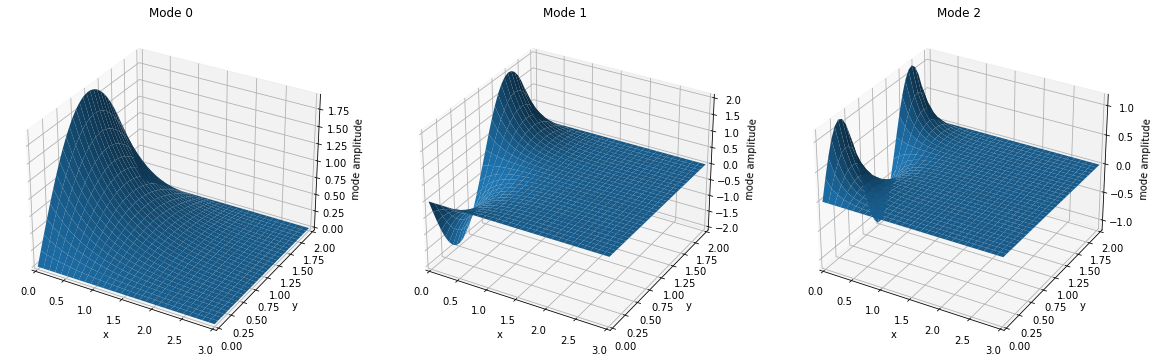

In [1]:
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sympy as sp
from IPython.display import display

# It is assumed that your final solution looks like 
# u = sum c_n * phi_n(y) * a_n(x)
# where there are no unkown integration constants in the expressions for a_n and phi_n.

# Sympy imports
#  In sympy variables are defined using sp.symbols. This tells Python that the variables y_s, H_s, n_s below are symbolic objects. 
#  In these notebooks subscript s is used to denote Sympy variables, whereas the variable without subscript s denotes a number or numpy array.
y_s, H_s = sp.symbols('y H')
n_s = sp.symbols('n', integer = True, positive=True)

# Variable definitions
g = y_s**5*(H_s-y_s) # Note the variable g is defined here as a Sympy function and uses variables with subscript s.
N=10
H=2 
L=3

# Define the numpy arrays x, y, n
lenx = 30
leny = 32
x = np.linspace(0,L,lenx).reshape((lenx,1,1))
y = np.linspace(0,H,leny).reshape((1,leny,1))
n = np.arange(1,N+1).reshape((1,1,N))

# The solution
g_n = sp.integrate(g*sp.sin(n_s*sp.pi/H_s*y_s),(y_s,0,H_s)) # This is a Sympy object that performs an analytical integral on the given expression.
g_nfun = sp.lambdify((n_s,H_s), g_n, modules='numpy') # this expression creates a function object that evaluates to a numpy array. It is the conversion step from sympy to numpy.
c_n = -2/(H*np.sinh(n*np.pi/H*L))*g_nfun(n,H) # Note the expressions below are all numpy arrays
a_n = np.sinh(n*np.pi/H*(x-L))
phi_n = np.sin(n*np.pi/H*y)

# Modes
mode_n = c_n*a_n*phi_n
mode1 = 0 # mode numbers to plot
mode2 = 1
mode3 = 2

# Plot
X, Y = np.meshgrid(x, y)
modes = [mode1, mode2, mode3]
fig = plt.figure(figsize=(20,8))
for q in range(3):
    ax = fig.add_subplot(1, 3, q+1, projection='3d')
    ax.plot_surface(X,Y,mode_n[:,:,modes[q]].T)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mode amplitude')
    ax.set_xlim(0,L)
    plt.ylim(0,H)
    plt.title('Mode '+str(modes[q]))

plt.show()

Let us next focus on the total solution. The computer cannot compute a sum for $n=1$ to $\infty$. This is approximated instead by running a sum from $n=1$ to $N<\infty$. 

h) Run the code and inspect the final solution. Change the value of $N$ in the code above and run the code above and below again to see the result. Why do we obtain a good approximation of the final solution if $N$ is sufficiently large?

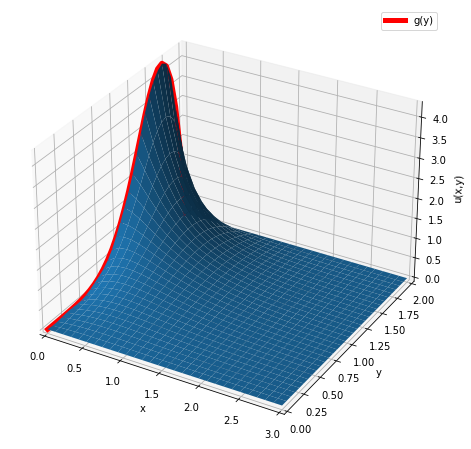

In [74]:
g_fun =  sp.lambdify((y_s,H_s), g, modules='numpy')
g_num = g_fun(y,H).flatten()

fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X,Y,np.sum(mode_n,axis=2).T)
ax.plot(y.flatten(), g_num, zs=0, zdir='x', color='r', linewidth=5, label='g(y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_xlim(0,L)
plt.ylim(0,H)
plt.legend()

plt.show()